# Displaying and Reviewing Images

### Project Goal: 
- Design a data annotation job using Figure-Eight platform that uses non-expert to identify and label cases of pneumonia. 
- This data will later be used to build a product that helps doctors quickly identify cases of pneumonia in children. This data would be used to build a classification system that: 
    - Can help flag serious cases
    - Quickly identify healthy cases
    - And, generally, act as a diagnostic aid for doctors

### Notebook Goal: 
- To be used to review the x-ray data, do exploratory analysis, and visualize the images.


### Visual symptoms: Healthy vs Pneumonia
- **normal, healthy images** will depict clear lungs without any areas of abnormal cloudiness/opacity. In healthy images, you are also more likely to see a diaphragm shadow
- **pneumonia image** may include a few things: areas of cloudiness/opacity in several concentrated areas or one large area. You may also see a general pattern of opacity that obscures the structure of the lungs, heart and diaphragm.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Obtaining Data

- Includes an initial inspection.

In [2]:
data = pd.read_csv('static/data/xray-image-data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 2 columns):
hosted_image    117 non-null object
label           16 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.9+ KB


In [3]:
data.head(5)

hosted_image  label
0  https://s3.amazonaws.com/video.udacity-data.co...    0.0
1  https://s3.amazonaws.com/video.udacity-data.co...    0.0
2  https://s3.amazonaws.com/video.udacity-data.co...    1.0
3  https://s3.amazonaws.com/video.udacity-data.co...    1.0
4  https://s3.amazonaws.com/video.udacity-data.co...    1.0

In [4]:
data.tail(5)

hosted_image  label
112  https://s3.amazonaws.com/video.udacity-data.co...    NaN
113  https://s3.amazonaws.com/video.udacity-data.co...    NaN
114  https://s3.amazonaws.com/video.udacity-data.co...    NaN
115  https://s3.amazonaws.com/video.udacity-data.co...    NaN
116  https://s3.amazonaws.com/video.udacity-data.co...    NaN

# Data Wrangling
- Editing for Image Labels
- Filling NANs with "Uknown", 1.0 for positive (sick) cases, and 0.0 negative.

In [5]:
data['label'].fillna('unknown', inplace = True)
data['label'] = data['label'].apply(lambda lab : "positive" if lab == 1.0 else 'unknown' if lab == 'unknown' else "negative")
data.tail()

hosted_image    label
112  https://s3.amazonaws.com/video.udacity-data.co...  unknown
113  https://s3.amazonaws.com/video.udacity-data.co...  unknown
114  https://s3.amazonaws.com/video.udacity-data.co...  unknown
115  https://s3.amazonaws.com/video.udacity-data.co...  unknown
116  https://s3.amazonaws.com/video.udacity-data.co...  unknown

The data is currently hosted on AWS so it will need to be read into this notebook.

In [6]:
data['hosted_image'].iloc[0]

'https://s3.amazonaws.com/video.udacity-data.com/topher/2019/April/5cad8060_img-0302/img-0302.jpeg'

# Exploratory Data Analysis
- Reviewing the image sizes (pixel length and width)

It is clear that not all of these images are of the same size, so it is important to inspect samples to see if the smaller once are difficult to read. The size of the X-ray should not influence the reviewers decision. If difficult to discern, it needs to be marked for review. 

In [7]:
import requests 
from PIL import Image
from io import BytesIO
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
#import cv2     

width = []
height = []
channels = []

for i in range(len(data['hosted_image'])):
    url = data['hosted_image'].iloc[i]
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    pix = np.array(img)
    
    dimensions = pix.shape
    width.append(dimensions[0])
    height.append(dimensions[1])
df_image_dims = pd.DataFrame(list(zip(width, height)), columns = ['Width (pixels)', 'Height (pixels)'])
df_image_dims.describe()

Width (pixels)  Height (pixels)
count      117.000000       117.000000
mean      1225.777778      1496.000000
std        519.508971       470.904431
min        190.000000       438.000000
25%        800.000000      1092.000000
50%       1224.000000      1496.000000
75%       1553.000000      1848.000000
max       2376.000000      2752.000000

Top ten rows showing the pixel length and width.

In [8]:
df_image_dims.head(10)

Width (pixels)  Height (pixels)
0            1087             1596
1            1314             1647
2             768             1048
3            1040             1448
4             560             1000
5            2155             2444
6            2032             2297
7            1168             1488
8            1187             1624
9            1882             2752

# Image Inspection

- Since there are only 117 images, they are all shown below. Some images (x-rays) have the "R" and others do not.
- The code maintains the aspect, but it is clear the sizes are different, just like the statistical analysis.
- The following output produces a title saying "positive", "negative" or "unknown".
- Label "positive" means that the patient is sick (has pnemonia)
- Label "negative" means that the patient is not diagnosed with pneumonia.
- Label "unknown" is a x-ray image that has not been diagnosed.

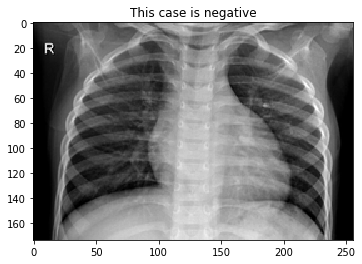

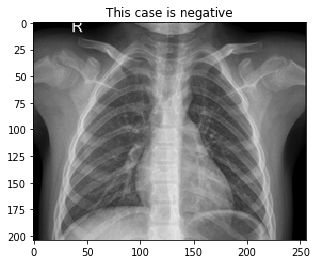

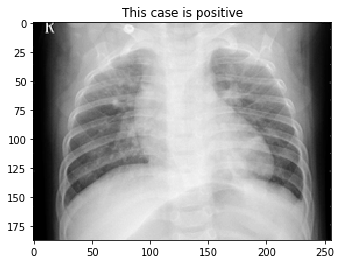

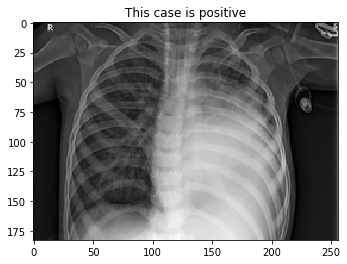

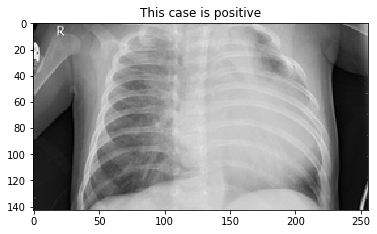

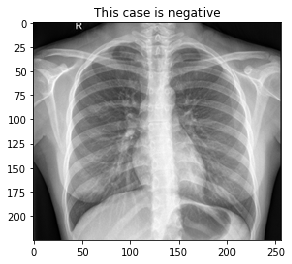

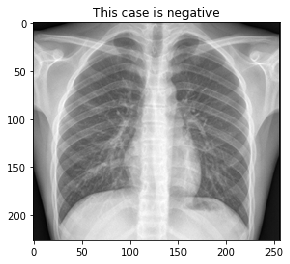

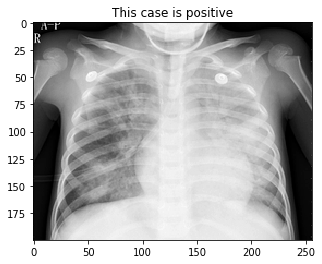

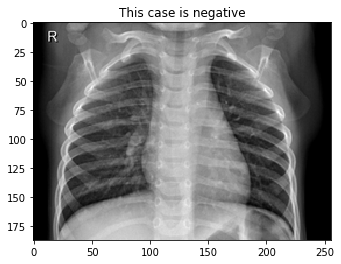

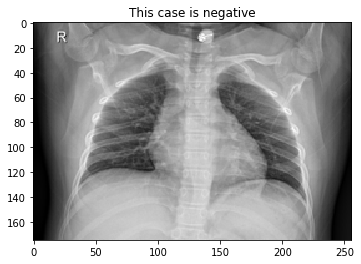

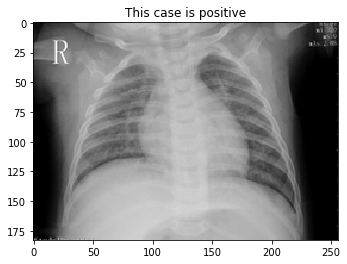

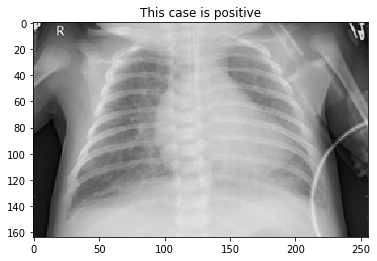

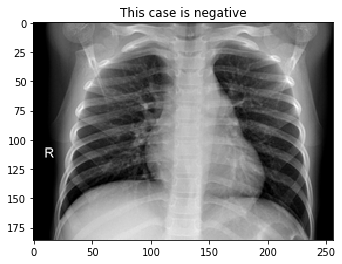

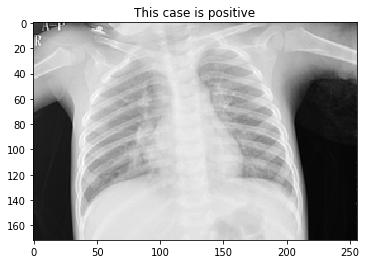

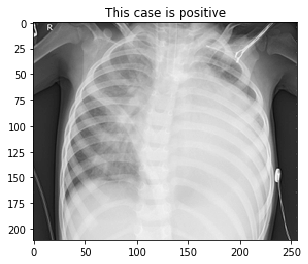

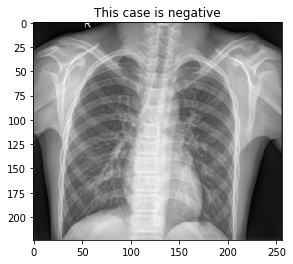

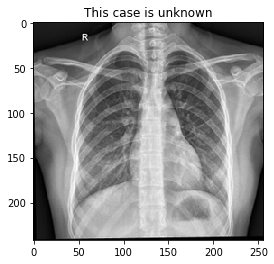

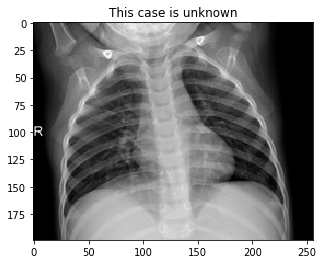

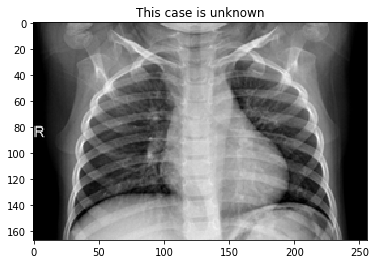

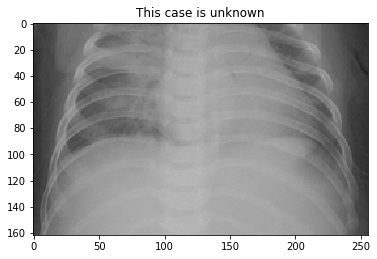

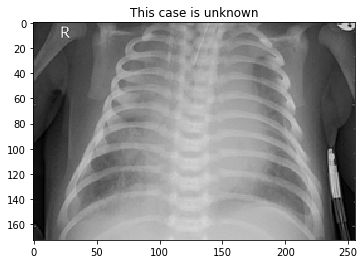

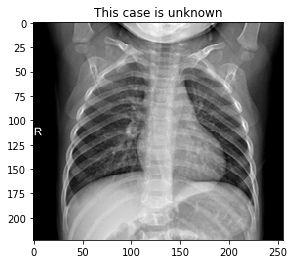

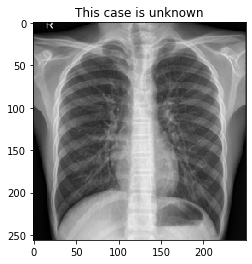

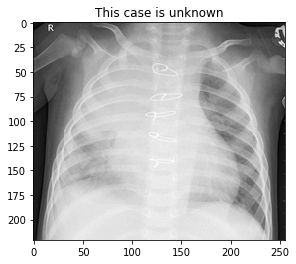

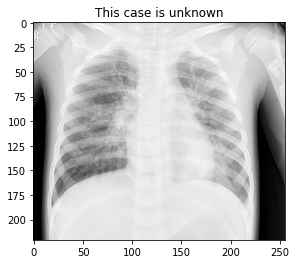

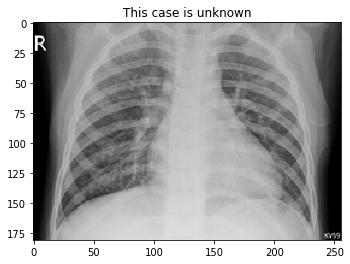

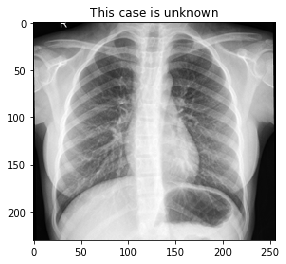

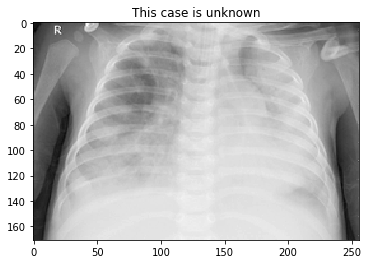

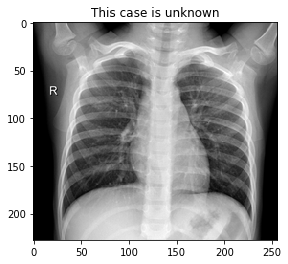

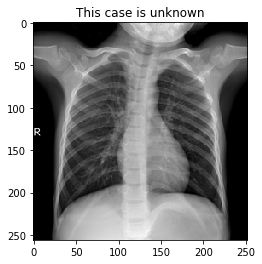

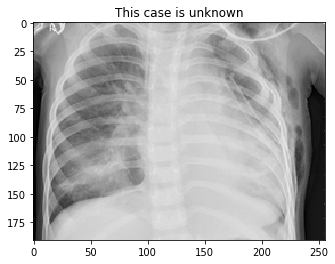

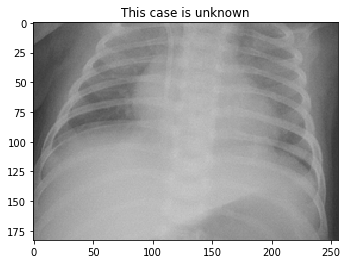

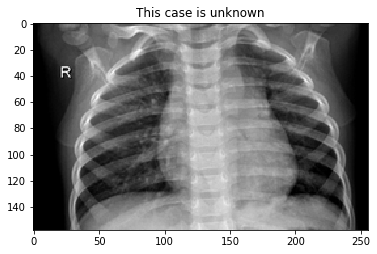

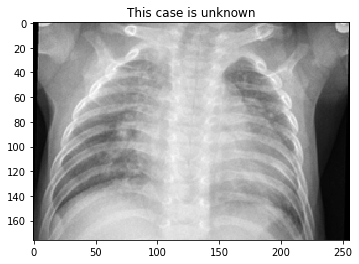

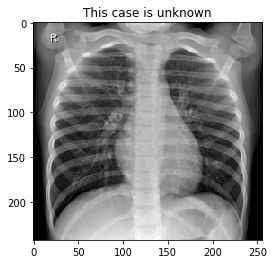

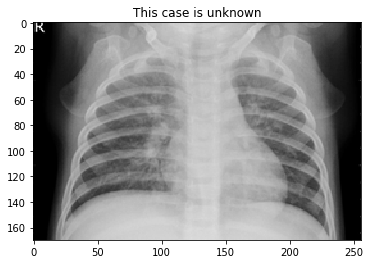

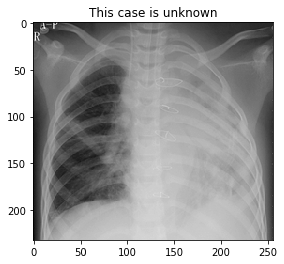

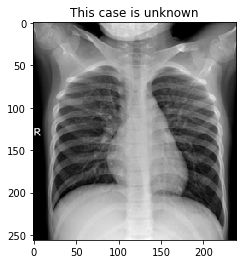

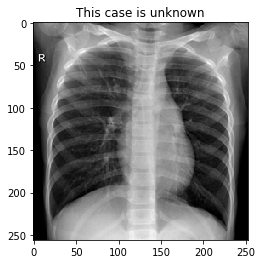

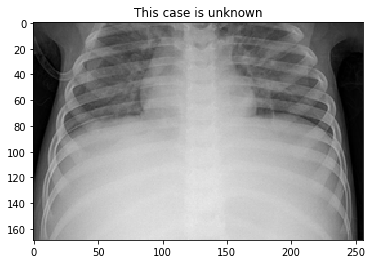

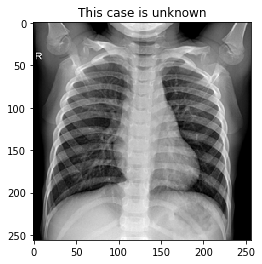

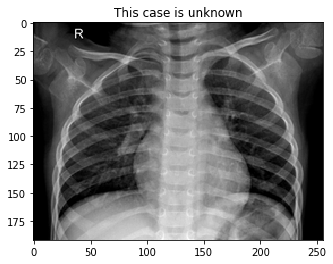

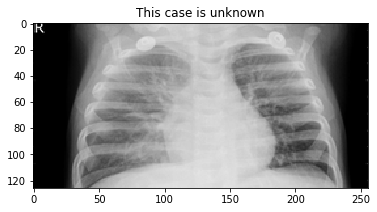

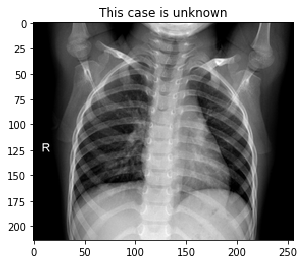

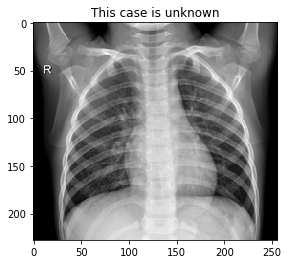

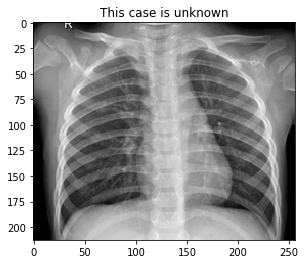

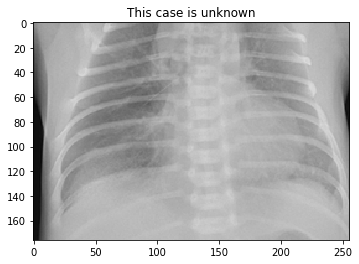

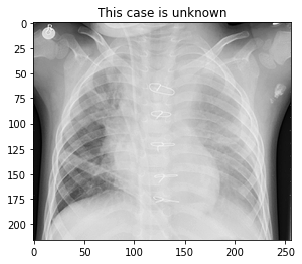

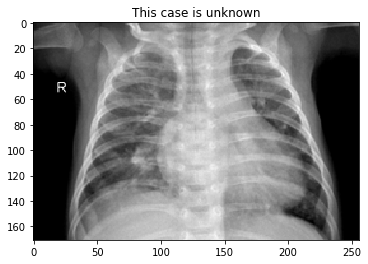

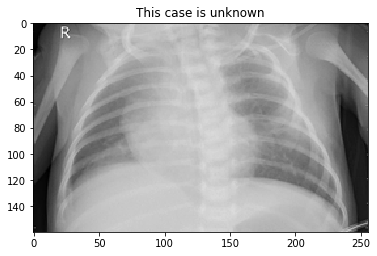

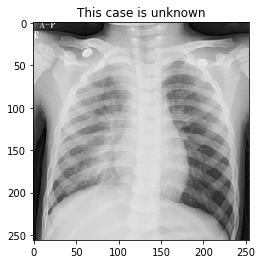

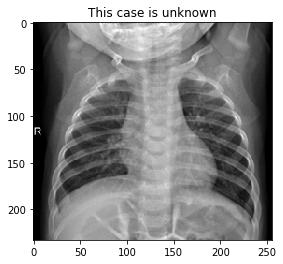

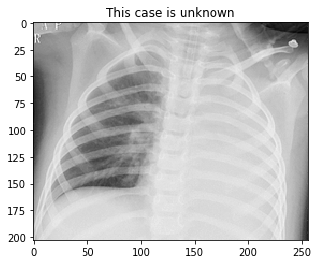

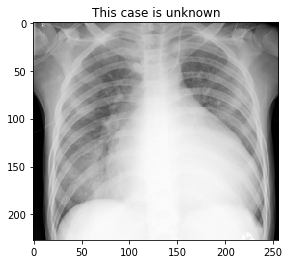

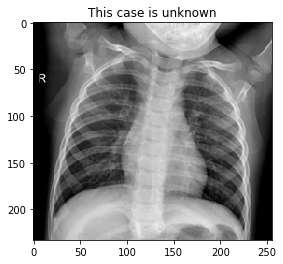

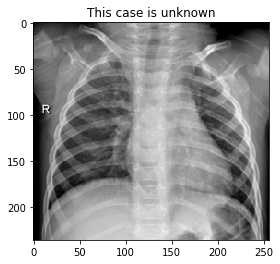

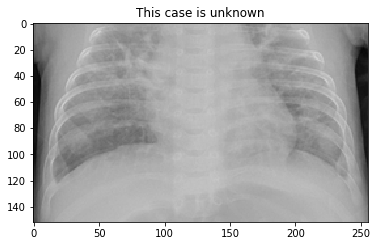

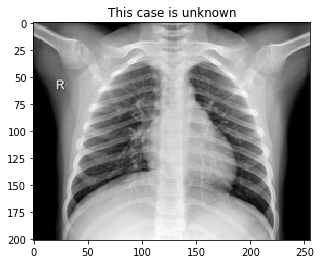

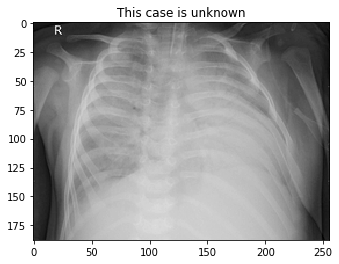

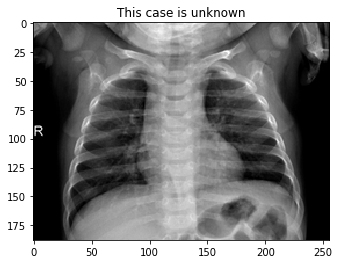

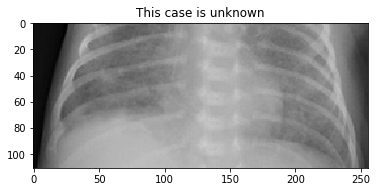

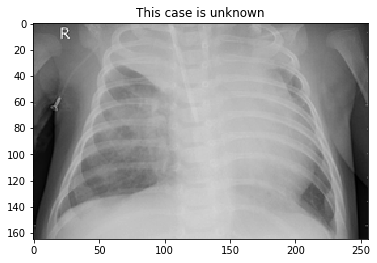

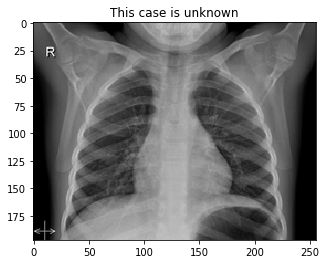

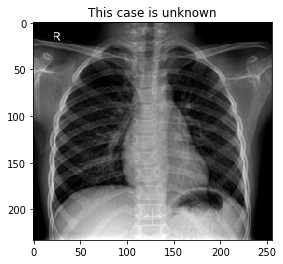

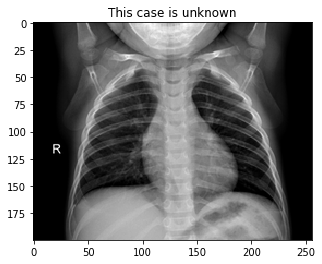

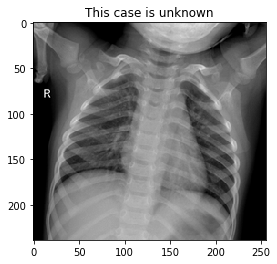

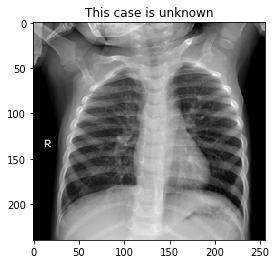

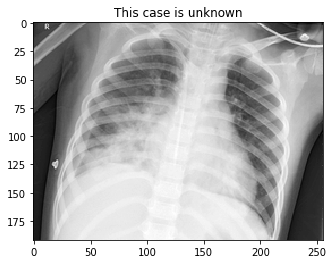

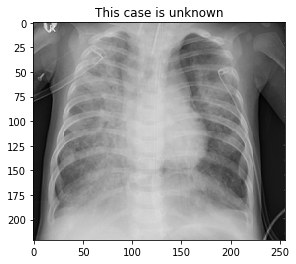

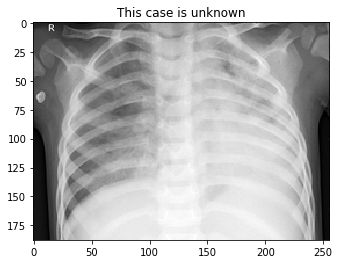

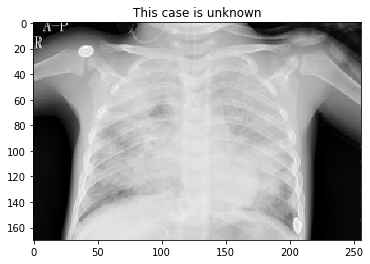

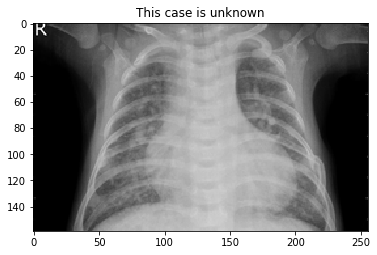

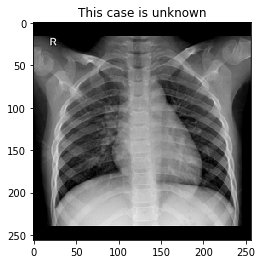

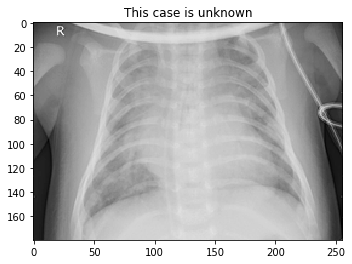

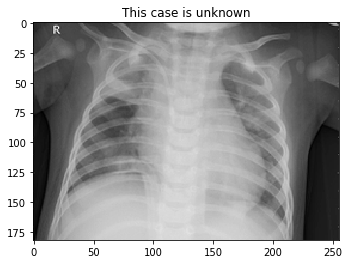

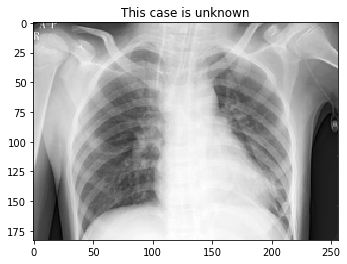

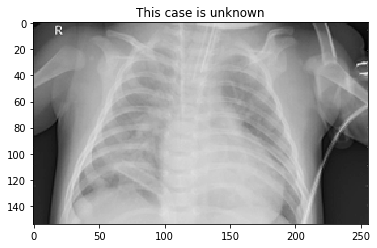

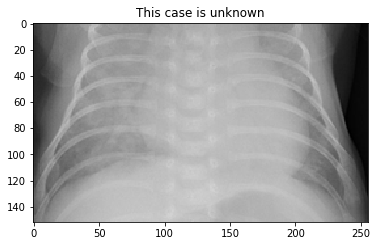

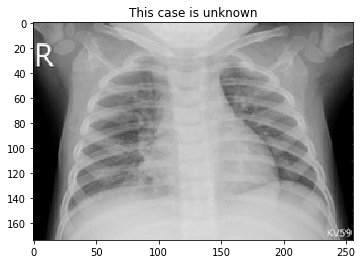

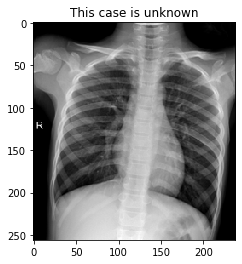

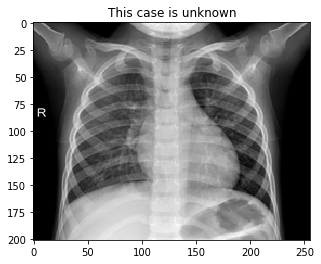

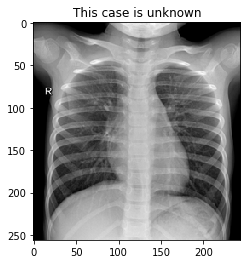

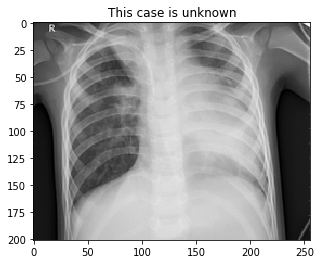

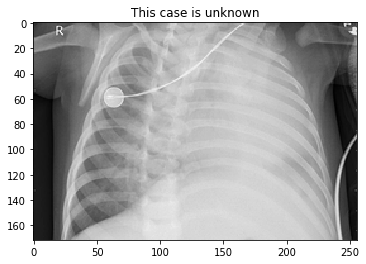

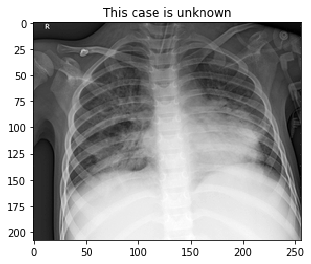

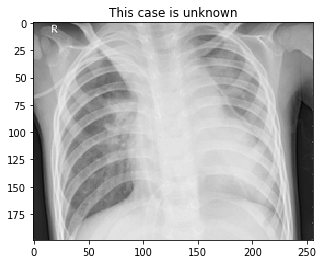

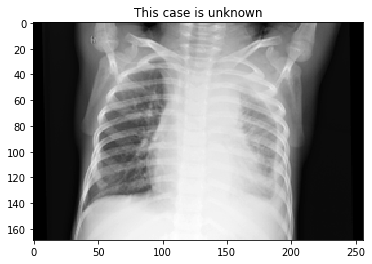

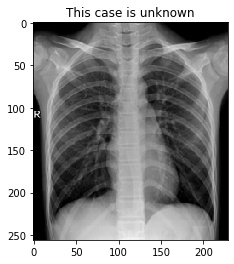

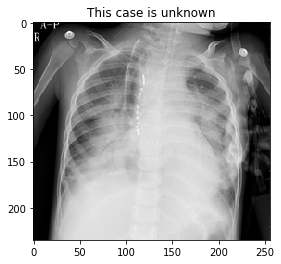

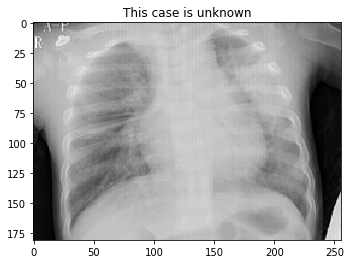

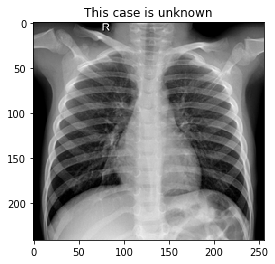

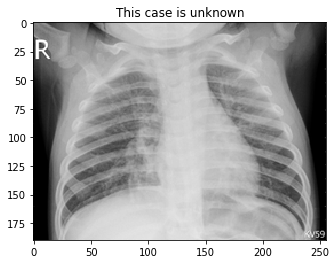

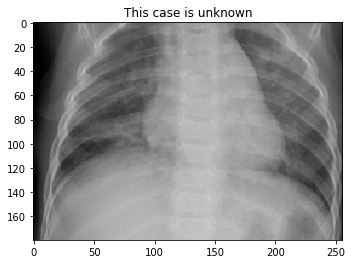

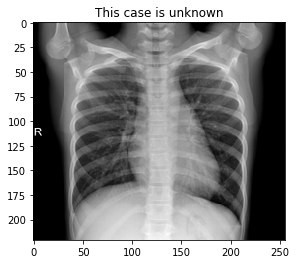

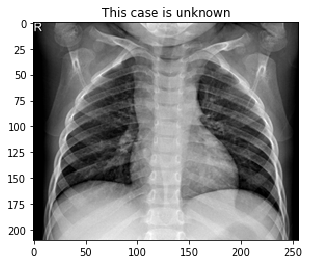

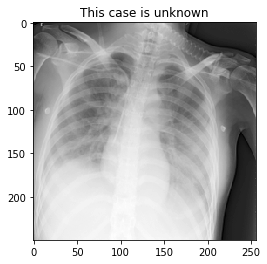

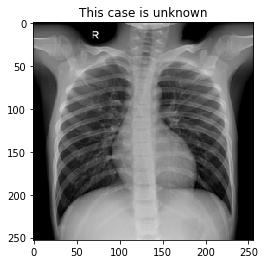

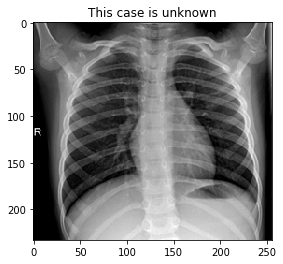

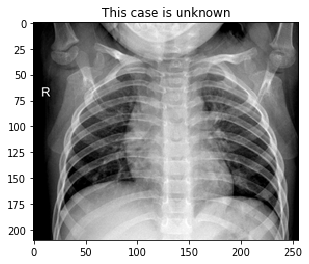

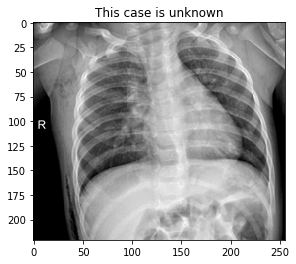

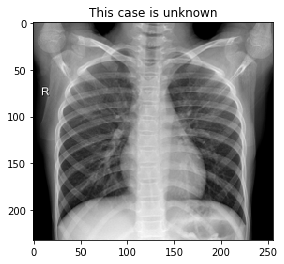

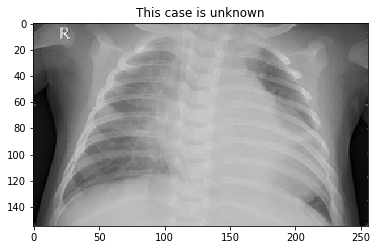

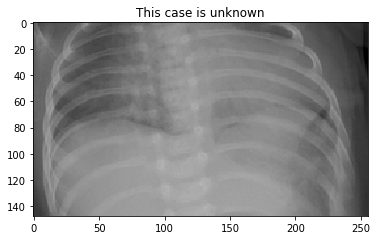

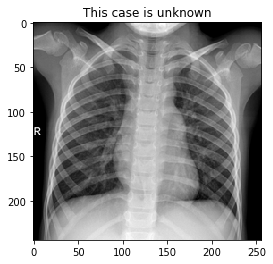

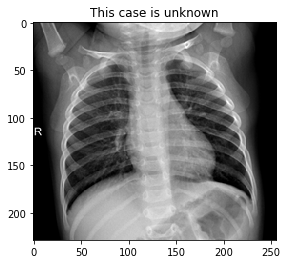

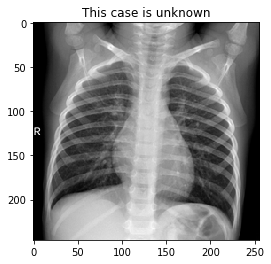

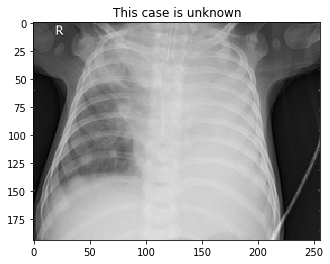

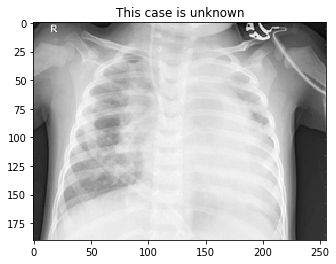

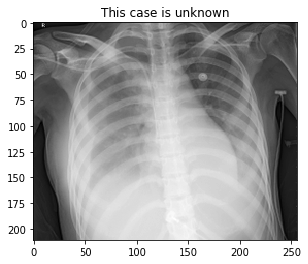

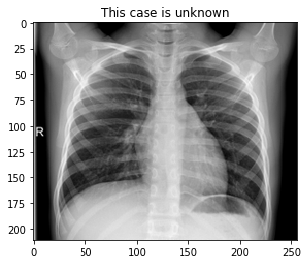

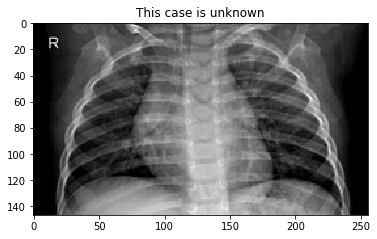

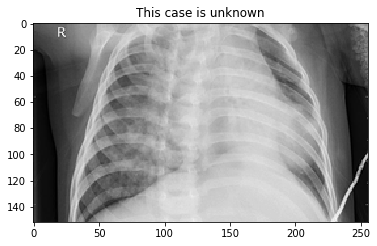

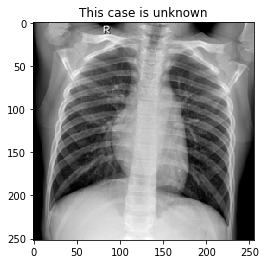

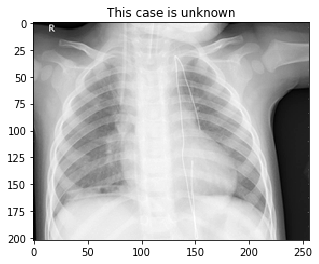

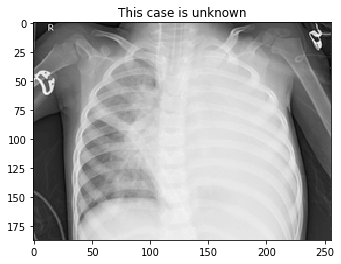

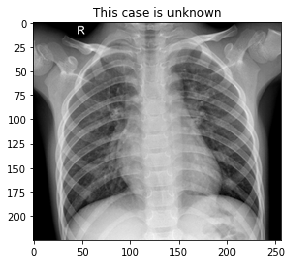

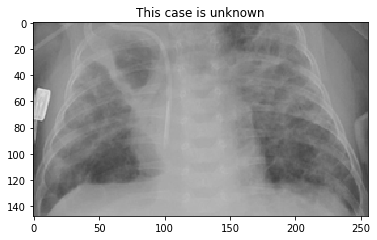

In [9]:
size = 256, 256


for i in range(len(data)):
#for i in range(5):
    url = data.iloc[i,0]
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img.thumbnail(size,Image.ANTIALIAS)
    plt.imshow(img, cmap="gray")
    plt.title("This case is {}".format(data.label.iloc[i])) #adding the label
    plt.show()

# Resources

- Full dataset: https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia
- Useful stack: https://stackoverflow.com/questions/273946/how-do-i-resize-an-image-using-pil-and-maintain-its-aspect-ratio